# Pymaceuticals Inc.
---

### Analysis

This analysis investigates the impact of 10 different drug treatments on tumor size in 248 mice.

Key observations include:

1. The Capomulin and Ramicane treatments yielded the smallest average tumor sizes.
2. These two treatments also exhibited the lowest standard deviation and variance in tumor sizes, indicating more consistent tumor reduction outcomes.
3. A strong correlation was found between subject weight and tumor size, with heavier mice tending to have larger tumors.
4. Although generally less effective, Infubinol had one outlier that produced results similar to the median result seen with Ramicane. This particular mouse warrants further investigation to understand the cause of this anomaly and explore the potential for replicating these results to enhance Infubinol's efficacy.

In [285]:
%matplotlib notebook
%matplotlib inline

In [286]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
summary_results=pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
summary_results=summary_results[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',	'Drug Regimen',	'Sex','Age_months',	'Weight (g)']]

# Display the data table for preview
summary_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [287]:
# Checking the number of mice.
mice_count=summary_results['Mouse ID'].nunique()
mice_count

249

In [288]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = summary_results[summary_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

print(duplicate_mouse_ids)

['g989']


In [289]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_data = summary_results[summary_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [290]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
summary_results_cleaned = summary_results[~summary_results['Mouse ID'].isin(duplicate_mouse_ids)]

summary_results_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [291]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned=summary_results_cleaned['Mouse ID'].nunique()
mice_count_cleaned

248

## Summary Statistics

In [292]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = summary_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
meadian_tumor =  summary_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor = summary_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_tumor = summary_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = summary_results_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor,
    'Median Tumor Volume':meadian_tumor,
    'Tumor Volume Variance':var_tumor,
    'Tumor Volume Std. Dev.': stdev_tumor,
    'Tumor Volume Std. Err.':sem_tumor
    })

# Display the data table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [293]:
import pandas as pd

print(pd.__version__)


2.2.2


In [294]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats.columns = pd.MultiIndex.from_tuples([('Tumor Volume (mm3)', 'mean'),('Tumor Volume (mm3)', 'median'),('Tumor Volume (mm3)', 'var'),('Tumor Volume (mm3)', 'std'),('Tumor Volume (mm3)', 'sem')])

# Display the data table
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

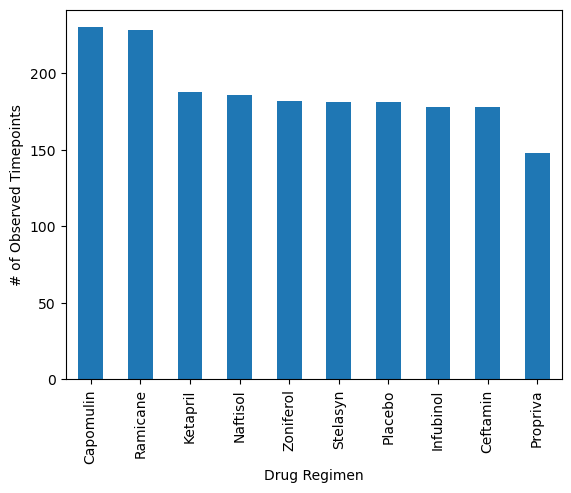

In [295]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by Drug Regimen and count the number of Timepoints for each regimen
regimen_timepoint_counts = summary_results_cleaned.groupby('Drug Regimen')['Timepoint'].count().reset_index()

# Sort by Timepoint and Drug Regimen in descending order of both
regimen_timepoint_counts = regimen_timepoint_counts.sort_values(by=['Timepoint', 'Drug Regimen'], ascending=[False, False])

# Plot the bar chart
regimen_timepoint_counts = regimen_timepoint_counts.plot(kind='bar', x='Drug Regimen', y='Timepoint',legend=False, xlabel='Drug Regimen', ylabel='# of Observed Timepoints')


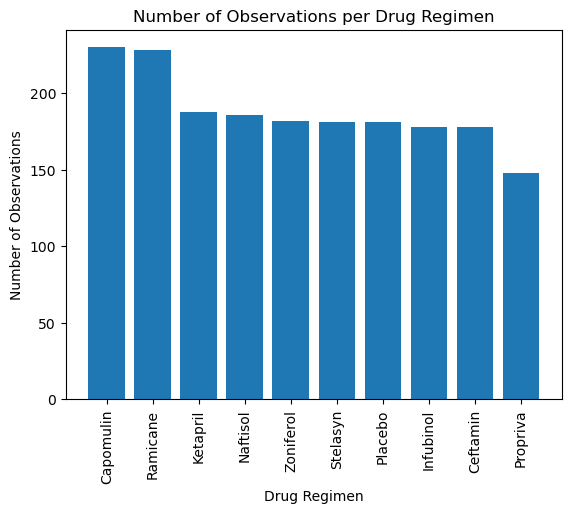

In [296]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the occurrences of each 'Drug Regimen' in the 'summary_results_cleaned' DataFrame
drug_counts = summary_results_cleaned['Drug Regimen'].value_counts()

# Plot the bar chart
plt.bar(drug_counts.index, drug_counts.values) 

# Set the title, axis labels, and xtick settings
plt.title('Number of Observations per Drug Regimen')  
plt.xlabel('Drug Regimen')  
plt.ylabel('Number of Observations')  
plt.xticks(rotation=90)

# Display the bar chart
plt.show() 

<Axes: ylabel='count'>

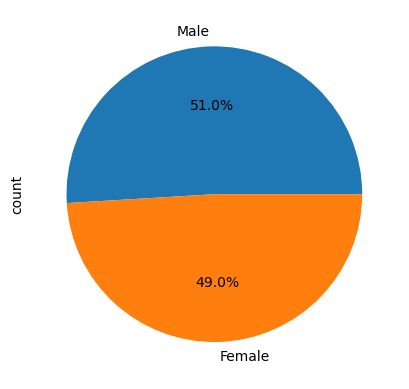

In [297]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = summary_results_cleaned['Sex'].value_counts()

# Make the pie chart
sex_counts.plot(kind='pie', autopct='%.1f%%', legend=False)


#####  My percentages are different from yours in teh starter file because the starter files used the uncleaned summary data that still had duplicates instead of the cleaned up unique values.

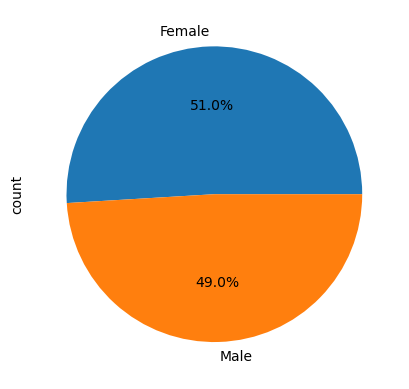

In [298]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = summary_results_cleaned['Sex'].value_counts()

# Set the labels
labels = summary_results_cleaned['Sex'].unique()
plt.ylabel('count')

# Make the pie chart
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%')

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [299]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = summary_results_cleaned.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Print a sample for review
print(last_tp.head())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_tp,summary_results_cleaned, on=['Mouse ID','Timepoint'], how='inner')

# Display a sample of the data table
final_tumor_volume.head()

  Mouse ID  Timepoint
0     a203         45
1     a251         45
2     a262         45
3     a275         45
4     a366         30


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [300]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    volumes = subset['Tumor Volume (mm3)'].tolist()
    tumor_volumes.append(volumes)


    # Determine outliers using upper and lower bounds
    Q1, Q3 = st.scoreatpercentile(volumes, [25, 75])
    IQR = st.iqr(volumes)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [volume for volume in volumes if volume < lower_bound or volume > upper_bound]

    if len(outliers) > 0:
        outlier_values = ', '.join(f"{outlier:.6f}" for outlier in outliers)  # Format for float precision
        print(f"{treatment}'s potential outliers: {outlier_values}")
    else:
        print(f"{treatment}'s potential outliers: None")


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.321346
Ceftamin's potential outliers: None


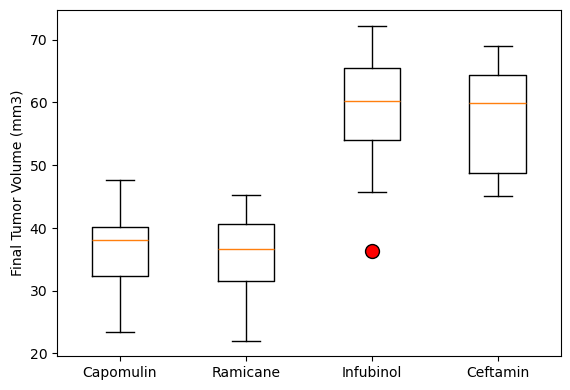

In [301]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Make the box plot
ax.boxplot(tumor_volumes, flierprops=flierprops)

# Set the axis labels and xtick settings
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticks(range(1, len(treatments) + 1))
ax.set_xticklabels(treatments)

# set the style of the outlier mark
flierprops = dict(marker='o', markersize=10, markerfacecolor='red')

# Display the box plot
plt.show()

## Line and Scatter Plots

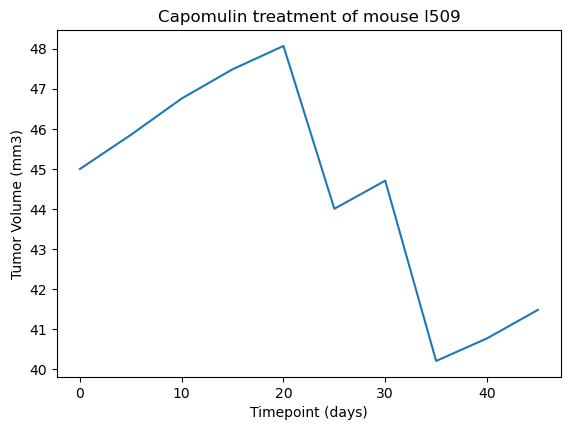

In [302]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Set the Mouse ID
mouse_id = 'l509'

# Filter the data to the Mouse ID and Capomulin
mouse_data = summary_results_cleaned[(summary_results_cleaned['Mouse ID'] == mouse_id) & 
                                     (summary_results_cleaned['Drug Regimen'] == 'Capomulin')]

# Set the figure size
plt.figure(figsize=(6.5, 4.5))

# Make the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')

# Set the title and axis labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the line plot
plt.show()

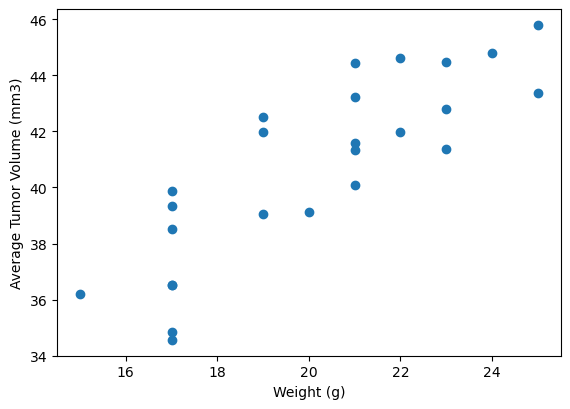

In [303]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin
capomulin_data = summary_results_cleaned[summary_results_cleaned['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse metadata to add the weight
merged_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Set the chart size
plt.figure(figsize=(6.5, 4.5))

# Make the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the scatter plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


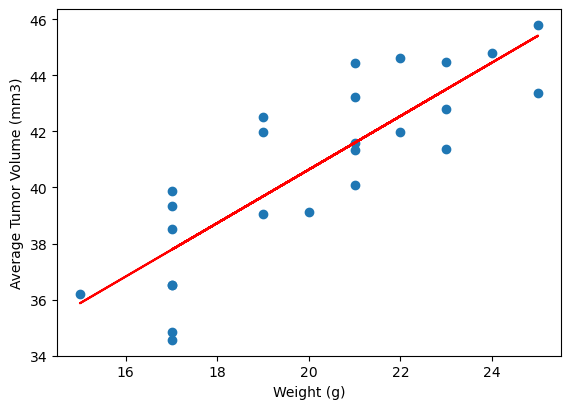

In [305]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin
capomulin_data = summary_results_cleaned[summary_results_cleaned['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume with the mouse metadata to add the weight
merged_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Display the correlation value in a message
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the chart size
plt.figure(figsize=(6.5, 4.5))

# Make the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Regression line')

# Set the axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the scatterplot
plt.show()
